In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

from chromaball.team import *

In [3]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [12]:
# format is: [ team_name, RGB values (len 3), (tackles_home, tackles_away), (completions_home, completions_away) ]
with open('nfl2020_data_tackles.pkl', 'rb') as fp:
    data = pickle.load(fp)
    print('nfl data incoming...')

nfl data incoming...


In [13]:
data['ARI'][0:3]

array([0.59215686, 0.1372549 , 0.24705882])

In [14]:
field_green = np.array([96,185,34]) / 255
field_green

array([0.37647059, 0.7254902 , 0.13333333])

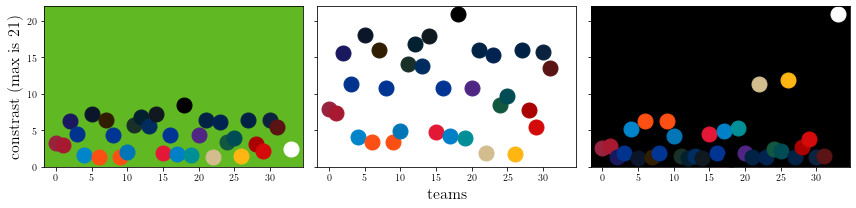

In [15]:
fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=True)

background = [field_green, [1.,1.,1.], [0.,0.,0]]

for ax, back in zip(axs, background):
    ax.set_facecolor(back)   
    i = 0
    #fig, ax = plt.subplots(1,1, figsize=(10,8))
    for t in data.keys():
        team = Team(t, data[t][0:3], data[t][3], data[t][4])
        contrast = team.contrast(team.color_home, color2=np.asarray(back))
        ax.plot(i, contrast, marker='.', markersize=30, color=team.color_home)
        i += 1
        
    contrast = team.contrast(team.color_away, color2=np.asarray(back))
    ax.plot(i+1, contrast, marker='.', markersize=30, color=team.color_away)
    
axs[0].set_ylabel('constrast (max is 21)',fontsize=16)
axs[1].set_xlabel('teams', fontsize=16)
fig.tight_layout()

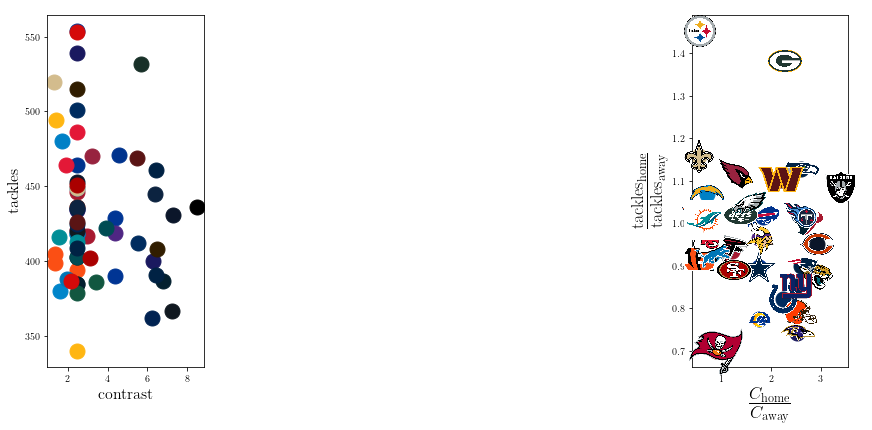

In [61]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

n_teams = (len(data))
C_ratio = np.zeros(n_teams)
tackle_ratio = np.zeros(n_teams)

i = 0
for t in data.keys():
    team = Team(t, data[t][0:3], data[t][3], data[t][4])
    contrast_home = team.contrast(team.color_home, color2=np.asarray(team.color_field))
    contrast_away = team.contrast(team.color_away, color2=np.asarray(team.color_field))
    
    ax[0].plot(contrast_home, team.tackles_home, marker='.', markersize=30, color=team.color_home)
    ax[0].plot(contrast_away, team.tackles_away, marker='.', markersize=30, color=team.color_home)
    
    C_ratio[i] = contrast_home / contrast_away
    tackle_ratio[i] = team.tackles_home / team.tackles_away

    ax[1].plot(C_ratio[i],  tackle_ratio[i], marker='.', markersize=30, color=team.color_home)
    
    path = f'logos/{t}.png'
    ab = AnnotationBbox(getImage(path), (C_ratio[i], tackle_ratio[i]), frameon=False)
    ax[1].add_artist(ab)

    i += 1

ax[0].set_xlabel(r'contrast', fontsize=16)    
ax[0].set_ylabel('tackles',fontsize=16)

ax[1].set_xlabel(r'$\frac{C_{\mathrm{home}}}{C_{\mathrm{away}}}$', fontsize=25)    
ax[1].set_ylabel(r'$\frac{\mathrm{tackles}_{\mathrm{home}}}{\mathrm{tackles}_{\mathrm{away}}}$',fontsize=25)

fig.tight_layout()

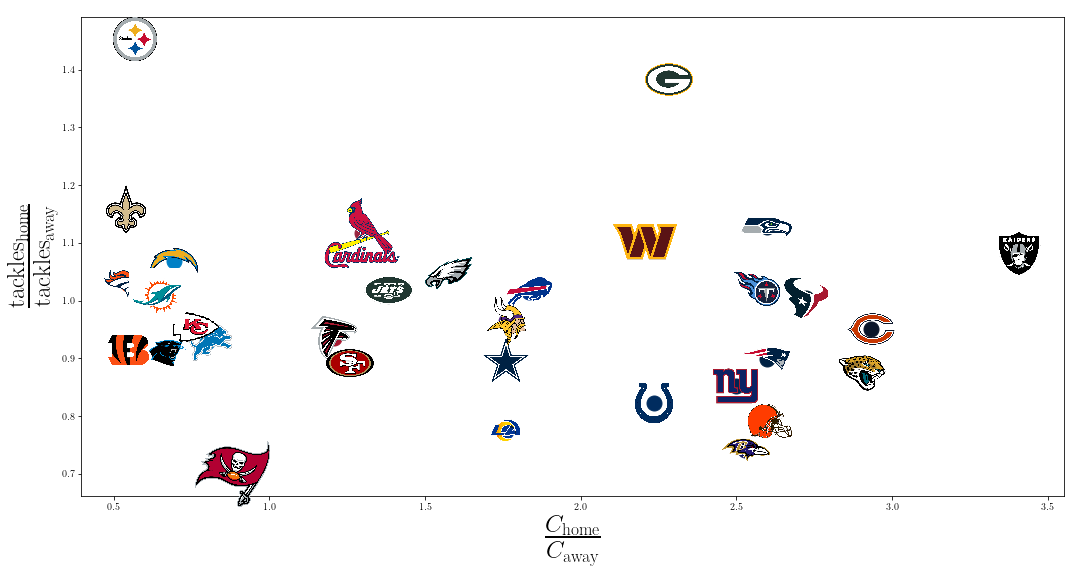

In [70]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

n_teams = (len(data))
C_ratio = np.zeros(n_teams)
tackle_ratio = np.zeros(n_teams)

i = 0
for t in data.keys():
    team = Team(t, data[t][0:3], data[t][3], data[t][4])
    contrast_home = team.contrast(team.color_home, color2=np.asarray(team.color_field))
    contrast_away = team.contrast(team.color_away, color2=np.asarray(team.color_field))

    C_ratio[i] = contrast_home / contrast_away
    tackle_ratio[i] = team.tackles_home / team.tackles_away

    ax.plot(C_ratio[i],  tackle_ratio[i], marker='.', markersize=30, color=team.color_home)
    
    path = f'logos/{t}.png'
    ab = AnnotationBbox(getImage(path), (C_ratio[i], tackle_ratio[i]), frameon=False)
    ax.add_artist(ab)

    i += 1

ax.set_xlabel(r'$\frac{C_{\mathrm{home}}}{C_{\mathrm{away}}}$', fontsize=35)    
ax.set_ylabel(r'$\frac{\mathrm{tackles}_{\mathrm{home}}}{\mathrm{tackles}_{\mathrm{away}}}$',fontsize=35)

fig.tight_layout()

In [47]:
np.corrcoef(C_ratio, tackle_ratio)

array([[ 1.        , -0.14153989],
       [-0.14153989,  1.        ]])

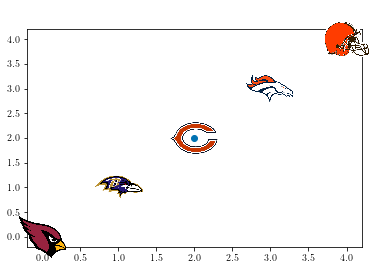

In [63]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=.07):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = [
    'logos/ARI.png',
    'logos/BAL.png',
    'logos/CHI.png',
    'logos/DEN.png',
    'logos/CLE.png']
    
x = [0,1,2,3,4]
y = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)